In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/Users/artus/Documents/endless_line/data/portaventura_world_data.csv")

/var/folders/bm/kgpgkg2x68q5_gr_614fr21c0000gn/T/ipykernel_51180/2804258912.py:1: DtypeWarning: Columns (14,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/artus/Documents/endless_line/data/portaventura_world_data.csv")


In [14]:
df

,DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,NB_MAX_UNIT,REF_CLOSING_DESCRIPTION,PARK_ATTENDANCE,NIGHT_SHOW,PARADE_1,PARADE_2,temp,humidity,wind_speed,is_holiday
0,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00.000,Bumper Cars,5,18.0,108.0000,254.749,254.75,...,18.0,NaN,NaN,NaN,NaN,NaN,6.76,83.0,7.48,True
1,2018-01-01,2018-01-01 09:15:00,9,2018-01-01 09:30:00.000,Bumper Cars,5,18.0,88.9999,254.749,254.75,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,2018-01-01,2018-01-01 09:30:00,9,2018-01-01 09:45:00.000,Bumper Cars,5,18.0,93.0001,254.749,254.75,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,2018-01-01,2018-01-01 09:45:00,9,2018-01-01 10:00:00.000,Bumper Cars,5,18.0,55.0000,254.749,254.75,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,2018-01-01,2018-01-01 10:00:00,10,2018-01-01 10:15:00.000,Bumper Cars,5,18.0,98.0001,254.749,254.75,...,18.0,NaN,NaN,NaN,NaN,NaN,6.77,87.0,7.33,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 21:45:00,21,2022-08-18 22:00:00.000,Zipline,30,12.0,68.0000,101.250,101.25,...,12.0,NaN,NaN,23:00:00,17:30:00,NaN,NaN,NaN,NaN,False
2369817,2022-08-18,2022-08-18 22:00:00,22,2022-08-18 22:15:00.000,Zipline,30,12.0,59.0000,101.250,101.25,...,12.0,NaN,NaN,23:00:00,17:30:00,NaN,20.23,84.0,4.20,False
2369818,2022-08-18,2022-08-18 22:15:00,22,2022-08-18 22:30:00.000,Zipline,30,12.0,57.0000,101.250,101.25,...,12.0,NaN,NaN,23:00:00,17:30:00,NaN,NaN,NaN,NaN,False
2369819,2022-08-18,2022-08-18 22:30:00,22,2022-08-18 22:45:00.000,Zipline,30,12.0,83.0000,101.250,101.25,...,12.0,NaN,NaN,23:00:00,17:30:00,NaN,NaN,NaN,NaN,False


In [11]:
df.columns

Index(['DATE', 'DEB_TIME', 'DEB_TIME_HOUR', 'FIN_TIME',
       'ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX', 'NB_UNITS',
       'GUEST_CARRIED', 'CAPACITY', 'ADJUST_CAPACITY', 'OPEN_TIME', 'UP_TIME',
       'DOWNTIME', 'NB_MAX_UNIT', 'REF_CLOSING_DESCRIPTION', 'PARK_ATTENDANCE',
       'NIGHT_SHOW', 'PARADE_1', 'PARADE_2', 'temp', 'humidity', 'wind_speed',
       'is_holiday'],
      dtype='object')

In [109]:
from datetime import datetime, timedelta
# Convertir les colonnes de temps en objets datetime
df['DEB_TIME'] = pd.to_datetime(df['DEB_TIME'], format='%Y-%m-%d %H:%M:%S')
df['PARADE_1'] = pd.to_datetime(df['PARADE_1'], format='%H:%M:%S')
df['PARADE_2'] = pd.to_datetime(df['PARADE_2'], format='%H:%M:%S')
df['NIGHT_SHOW'] = pd.to_datetime(df['NIGHT_SHOW'], format='%H:%M:%S')

def is_parade_in_progress(deb_time_hour, parade_time):
    if pd.isnull(parade_time):
        return False
    return deb_time_hour == parade_time.hour

# Ajouter des colonnes pour indiquer si une parade est en cours
df['PARADE_1_IN_PROGRESS'] = df.apply(lambda row: is_parade_in_progress(row['DEB_TIME_HOUR'], row['PARADE_1']), axis=1)
df['PARADE_2_IN_PROGRESS'] = df.apply(lambda row: is_parade_in_progress(row['DEB_TIME_HOUR'], row['PARADE_2']), axis=1)
df['NIGHT_SHOW_IN_PROGRESS'] = df.apply(lambda row: is_parade_in_progress(row['DEB_TIME_HOUR'], row['NIGHT_SHOW']), axis=1)

# Ajouter une colonne pour indiquer si une parade quelconque est en cours
df['ANY_PARADE_IN_PROGRESS'] = df['PARADE_1_IN_PROGRESS'] | df['PARADE_2_IN_PROGRESS'] | df['NIGHT_SHOW_IN_PROGRESS']

# Comparer les temps d'attente moyens pendant les créneaux horaires avec et sans parade
wait_time_with_parade = df[df['ANY_PARADE_IN_PROGRESS']]['WAIT_TIME_MAX'].mean()
wait_time_without_parade = df[~df['ANY_PARADE_IN_PROGRESS']]['WAIT_TIME_MAX'].mean()

print(f"Temps d'attente moyen avec parade en cours : {wait_time_with_parade}")
print(f"Temps d'attente moyen sans parade en cours : {wait_time_without_parade}")

Temps d'attente moyen avec parade en cours : 14.748943102043983
Temps d'attente moyen sans parade en cours : 12.531061097609628


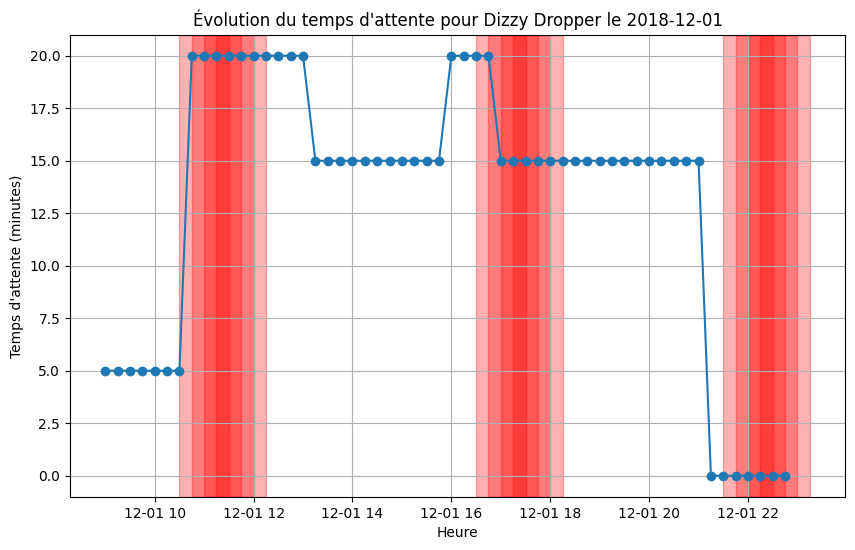

In [110]:
import random
# Filtrer les données pour une journée où il y a des parades
parade_days = df[df['ANY_PARADE_IN_PROGRESS']]['DATE'].unique()
selected_day = random.choice(parade_days)
df_day = df[df['DATE'] == selected_day]

# Sélectionner une attraction au hasard
attractions = df_day['ENTITY_DESCRIPTION_SHORT'].unique()
selected_attraction = random.choice(attractions)
df_attraction = df_day[df_day['ENTITY_DESCRIPTION_SHORT'] == selected_attraction]

# Créer un graphique de l'évolution du temps d'attente sur la journée
plt.figure(figsize=(10, 6))
plt.plot(df_attraction['DEB_TIME'], df_attraction['WAIT_TIME_MAX'], marker='o', label='Temps d\'attente')

# Mettre en évidence les moments où la parade a lieu avec une plage de couleur
parade_times = df_attraction[df_attraction['ANY_PARADE_IN_PROGRESS']]['DEB_TIME']
for parade_time in parade_times:
    plt.axvspan(parade_time - timedelta(minutes=30), parade_time + timedelta(minutes=30), color='red', alpha=0.3, label='Parade')

plt.xlabel('Heure')
plt.ylabel('Temps d\'attente (minutes)')
plt.title(f'Évolution du temps d\'attente pour {selected_attraction} le {selected_day}')
plt.grid(True)
plt.show()

/var/folders/bm/kgpgkg2x68q5_gr_614fr21c0000gn/T/ipykernel_51180/3864298805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_parade['DEB_TIME_HOUR'] = df_no_parade['DEB_TIME'].dt.hour
/var/folders/bm/kgpgkg2x68q5_gr_614fr21c0000gn/T/ipykernel_51180/3864298805.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_parade['DEB_TIME_HOUR'] = df_with_parade['DEB_TIME'].dt.hour


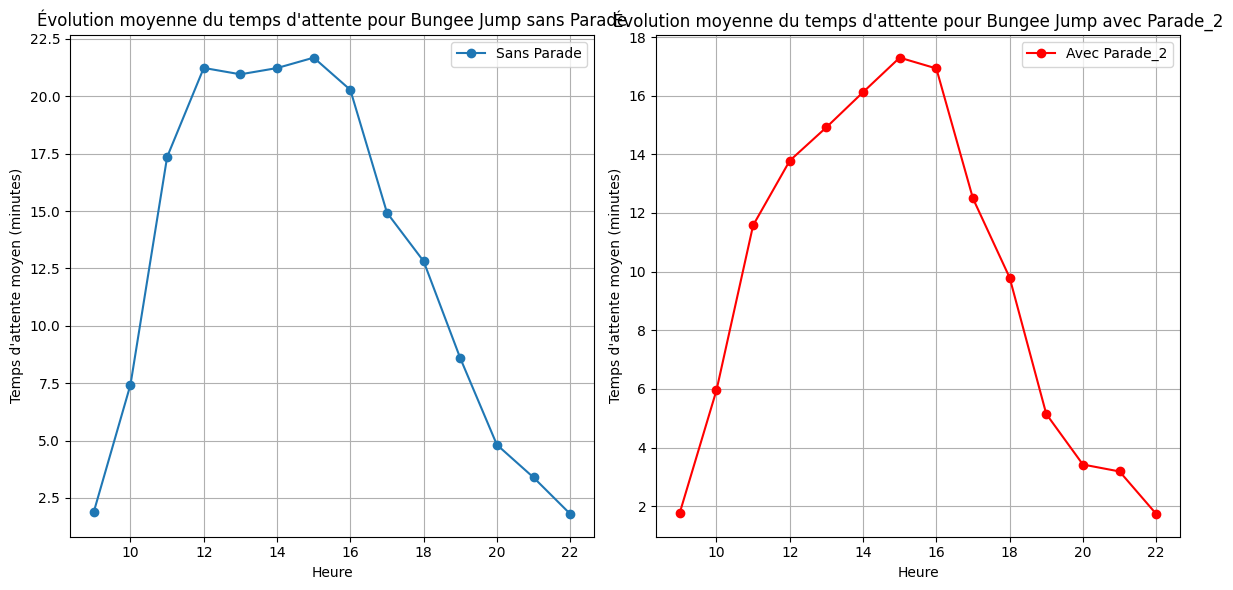

In [126]:
# Sélectionner une attraction au hasard
attractions = df['ENTITY_DESCRIPTION_SHORT'].unique()
selected_attraction = random.choice(attractions)
df_attraction = df[df['ENTITY_DESCRIPTION_SHORT'] == selected_attraction]

# Calculer l'évolution moyenne du temps d'attente sur une journée lorsqu'il n'y a pas de parade
df_no_parade = df_attraction[df_attraction['PARADE_2'].isnull()]
df_no_parade['DEB_TIME_HOUR'] = df_no_parade['DEB_TIME'].dt.hour
mean_wait_time_no_parade = df_no_parade.groupby('DEB_TIME_HOUR')['WAIT_TIME_MAX'].mean()

# Calculer l'évolution moyenne du temps d'attente sur une journée lorsqu'il y a une PARADE_2
df_with_parade = df_attraction[df_attraction['PARADE_2'].notnull()]
df_with_parade['DEB_TIME_HOUR'] = df_with_parade['DEB_TIME'].dt.hour
mean_wait_time_with_parade = df_with_parade.groupby('DEB_TIME_HOUR')['WAIT_TIME_MAX'].mean()

# Tracer les graphiques pour comparer les deux situations
plt.figure(figsize=(12, 6))

# Graphique pour l'évolution moyenne du temps d'attente sans parade
plt.subplot(1, 2, 1)
plt.plot(mean_wait_time_no_parade.index, mean_wait_time_no_parade.values, marker='o', label='Sans Parade')
plt.xlabel('Heure')
plt.ylabel('Temps d\'attente moyen (minutes)')
plt.title(f'Évolution moyenne du temps d\'attente pour {selected_attraction} sans Parade')
plt.legend()
plt.grid(True)

# Graphique pour l'évolution moyenne du temps d'attente avec PARADE_2
plt.subplot(1, 2, 2)
plt.plot(mean_wait_time_with_parade.index, mean_wait_time_with_parade.values, marker='o', label='Avec Parade_2', color='red')
plt.xlabel('Heure')
plt.ylabel('Temps d\'attente moyen (minutes)')
plt.title(f'Évolution moyenne du temps d\'attente pour {selected_attraction} avec Parade_2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [127]:
# Convertir les colonnes de temps en objets datetime
df['DEB_TIME'] = pd.to_datetime(df['DEB_TIME'], format='%Y-%m-%d %H:%M:%S')
df['FIN_TIME'] = pd.to_datetime(df['FIN_TIME'], format='%Y-%m-%d %H:%M:%S')

# Calculer le temps total de réparation et le temps total d'ouverture pour chaque attraction
df['UP_TIME'] = df['UP_TIME'].astype(float)
df['DOWNTIME'] = df['DOWNTIME'].astype(float)

agg_df = df.groupby('ENTITY_DESCRIPTION_SHORT').agg({
    'UP_TIME': 'sum',
    'DOWNTIME': 'sum'
}).reset_index()

# Calculer le ratio du temps de réparation par rapport au temps d'ouverture pour chaque attraction
agg_df['REPAIR_RATIO'] = agg_df['DOWNTIME'] / (agg_df['UP_TIME'] + agg_df['DOWNTIME'])

# Trier les attractions par ce ratio et sélectionner les 3 premières
top_3_attractions = agg_df.sort_values(by='REPAIR_RATIO', ascending=False).head(3)

print(top_3_attractions)

ValueError: unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": ".000", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [130]:
df['FIN_TIME']

0          2018-01-01 09:15:00.000
1          2018-01-01 09:30:00.000
2          2018-01-01 09:45:00.000
3          2018-01-01 10:00:00.000
4          2018-01-01 10:15:00.000
                    ...           
2369816    2022-08-18 22:00:00.000
2369817    2022-08-18 22:15:00.000
2369818    2022-08-18 22:30:00.000
2369819    2022-08-18 22:45:00.000
2369820    2022-08-18 23:00:00.000
Name: FIN_TIME, Length: 2369821, dtype: object

In [135]:
# Convertir la colonne USAGE_DATE en objets datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

# Filtrer les données pour les 365 derniers jours disponibles
end_date = df['DATE'].max()
start_date = end_date - pd.Timedelta(days=365)
df_filtered = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]

# Filtrer les données pour les attractions où GUEST_CARRIED est inférieur à ADJUST_CAPACITY
df_filtered = df_filtered[df_filtered['GUEST_CARRIED'] < df_filtered['ADJUST_CAPACITY']]

# Créer un graphique pour visualiser les temps d'attente et les capacités ajustées
plt.figure(figsize=(12, 6))
plt.scatter(df_filtered['WAIT_TIME_MAX'], df_filtered['GUEST_CARRIED'], color='blue', label='GUEST_CARRIED')
plt.scatter(df_filtered['WAIT_TIME_MAX'], df_filtered['ADJUST_CAPACITY'], color='red', label='ADJUST_CAPACITY')

# Ajouter des annotations pour les attractions
for i in range(len(df_filtered)):
    plt.annotate(df_filtered['ENTITY_DESCRIPTION_SHORT'].iloc[i],
                 (df_filtered['WAIT_TIME_MAX'].iloc[i], df_filtered['GUEST_CARRIED'].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Temps d\'attente maximum (minutes)')
plt.ylabel('Capacité')
plt.title('Attractions avec de forts temps d\'attente mais ne tournant pas au maximum de leurs capacités')
plt.legend()
plt.grid(True)
plt.show()

/Users/artus/miniconda3/envs/eleven_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 